# EDLIF model

Jaras I, Harada T, Orchard ME, Maldonado PE, Vergara RC. Extending the integrate-and-fire model to account for metabolic dependencies. Eur J Neurosci. 2021 Aug;54(4):5249-5260. doi: 10.1111/ejn.15326. Epub 2021 Jul 16. PMID: 34109698.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nest
import numpy as np
import os

from pynestml.frontend.pynestml_frontend import generate_nest_target

NEST_SIMULATOR_INSTALL_LOCATION = nest.ll_api.sli_func("statusdict/prefix ::")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
neuron_model = [
    "edlif_psc_base.nestml", 
    "edlif_psc_nonlineardendrite.nestml",
    "edlif_psc_supply_state.nestml",
    "edlif_psc_supply_inline.nestml",
    "edlif_psc_percent.nestml"
]
neuron_id = 4
generate_nest_target(input_path=neuron_model[neuron_id],
                     target_path="/tmp/nestml-component",
                     logging_level="INFO",
                     codegen_opts={"nest_path": NEST_SIMULATOR_INSTALL_LOCATION})

[1,GLOBAL, INFO]: List of files that will be processed:
[2,GLOBAL, INFO]: /home/wis/Documents/nestml/edlif/edlif_psc_percent.nestml
[3,GLOBAL, INFO]: No module name specified; the generated module will be named "nestmlmodule"
[4,GLOBAL, INFO]: Start processing '/home/wis/Documents/nestml/edlif/edlif_psc_percent.nestml'!
[6,edlif_psc_percent, WARNING, [148:11;148:11]]: Implicit casting from (compatible) type 'mV' to 'integer'.
[7,edlif_psc_percent, WARNING, [57:31;57:39]]: Non-matching unit types at pA +/- pA buffer! Implicitly replaced by pA +/- 1.0 * pA buffer.
[8,edlif_psc_percent, WARNING, [57:13;57:22]]: Non-matching unit types at mV / ms +/- pA / pF! Implicitly replaced by mV / ms +/- 1.0 * pA / pF.
[9,edlif_psc_percent, WARNING, [62:16;62:16]]: Implicit casting from (compatible) type '1 / ms' to 'real'.
[10,edlif_psc_percent, INFO, [24:15;24:15]]: Implicit casting from (compatible) type 'integer' to 'real'.


INFO:Analysing input:
INFO:{
    "dynamics": [
        {
            "expression": "V_abs' = -V_abs / tau_m + ((I_kernel_exc__X__exc_spikes - I_kernel_inh__X__inh_spikes) + I_e + I_stim) / C_m",
            "initial_values": {
                "V_abs": "0"
            }
        },
        {
            "expression": "ATP' = ((ATP_h - ATP) * K_ATP * homeostatic_s_enabled - (E_ap_tr / tau_ap * E_ap / o_t)) * o_t",
            "initial_values": {
                "ATP": "90"
            }
        },
        {
            "expression": "E_ap_tr' = -E_ap_tr / tau_ap",
            "initial_values": {
                "E_ap_tr": "0.0"
            }
        },
        {
            "expression": "E_ap_tr2' = E_ap_der - E_ap_tr2 / tau_ap",
            "initial_values": {
                "E_ap_tr2": "0.0"
            }
        },
        {
            "expression": "E_ap_der' = -E_ap_der / tau_ap",
            "initial_values": {
                "E_ap_der": "0.0"
            }
        },
        {


[11,edlif_psc_percent, INFO, [82:17;82:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[12,edlif_psc_percent, INFO, [85:17;85:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[13,edlif_psc_percent, INFO, [86:16;86:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[14,edlif_psc_percent, INFO, [87:16;87:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[15,edlif_psc_percent, INFO, [88:16;88:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[16,edlif_psc_percent, INFO, [92:25;92:32]]: Implicit casting from (compatible) type 'integer' to 'real'.
[17,edlif_psc_percent, INFO, [123:30;123:30]]: Implicit casting from (compatible) type 'integer' to 'real'.
[18,edlif_psc_percent, INFO, [125:30;125:30]]: Implicit casting from (compatible) type 'integer' to 'real'.
[19,edlif_psc_percent, INFO, [139:17;139:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[20,edlif_psc_percent, INFO, [140:18;140

INFO:	Returning shape: Shape "V_abs" of order 1
INFO:Shape V_abs: reconstituting expression -V_abs/tau_m + I_e/C_m + (I_kernel_exc__X__exc_spikes - I_kernel_inh__X__inh_spikes + I_stim)/C_m
INFO:
Processing differential-equation form shape ATP with defining expression = "((ATP_h - ATP) * K_ATP * homeostatic_s_enabled - (E_ap_tr / tau_ap * E_ap / o_t)) * o_t"
INFO:	Returning shape: Shape "ATP" of order 1
INFO:Shape ATP: reconstituting expression (-E_ap*E_ap_tr + K_ATP*homeostatic_s_enabled*o_t*tau_ap*(-ATP + ATP_h))/tau_ap
INFO:
Processing differential-equation form shape E_ap_tr with defining expression = "-E_ap_tr / tau_ap"
INFO:	Returning shape: Shape "E_ap_tr" of order 1
INFO:Shape E_ap_tr: reconstituting expression -E_ap_tr/tau_ap
INFO:
Processing differential-equation form shape E_ap_tr2 with defining expression = "E_ap_der - E_ap_tr2 / tau_ap"
INFO:	Returning shape: Shape "E_ap_tr2" of order 1
INFO:Shape E_ap_tr2: reconstituting expression E_ap_der - E_ap_tr2/tau_ap
INFO:
Process

[27,edlif_psc_percent, INFO, [82:17;82:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[28,edlif_psc_percent, INFO, [85:17;85:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[29,edlif_psc_percent, INFO, [86:16;86:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[30,edlif_psc_percent, INFO, [87:16;87:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[31,edlif_psc_percent, INFO, [88:16;88:16]]: Implicit casting from (compatible) type 'integer' to 'real'.
[32,edlif_psc_percent, INFO, [92:25;92:32]]: Implicit casting from (compatible) type 'integer' to 'real'.
[33,edlif_psc_percent, INFO, [123:30;123:30]]: Implicit casting from (compatible) type 'integer' to 'real'.
[34,edlif_psc_percent, INFO, [125:30;125:30]]: Implicit casting from (compatible) type 'integer' to 'real'.
[35,edlif_psc_percent, INFO, [139:17;139:17]]: Implicit casting from (compatible) type 'integer' to 'real'.
[36,edlif_psc_percent, INFO, [140:18;140

In [3]:
nest.Install("nestmlmodule")


May 16 18:18:27 Install [Info]: 
    loaded module nestmlmodule


resolution time: 0.1
Using neuron model: edlif_psc_percent
absolute error of integration: (0.001,)


/tmp/ipykernel_49876/2941367915.py:57: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


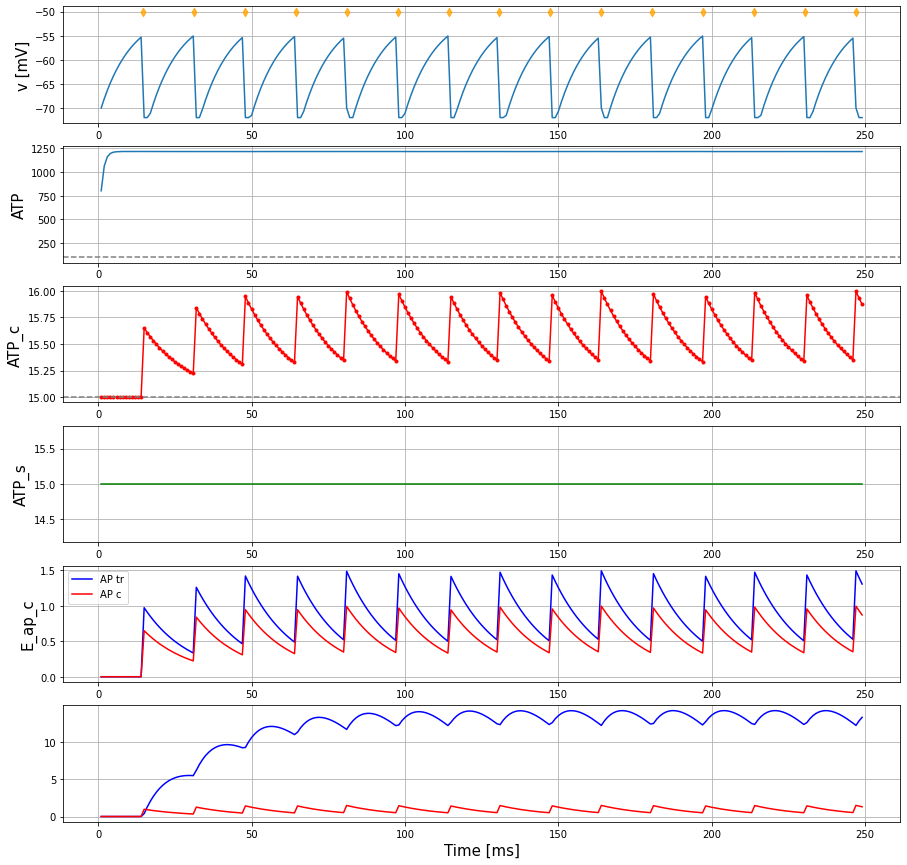

In [4]:
nest.set_verbosity("M_WARNING")
nest.ResetKernel()

# resolution
nest.resolution = 0.1
resolution = nest.GetKernelStatus()["resolution"]
print(f"resolution time: {resolution}") 

neuron_model_name = neuron_model[neuron_id].split(".")[0]
print(f"Using neuron model: {neuron_model_name}")


neuron = nest.Create(neuron_model_name)
voltmeter = nest.Create("voltmeter")

voltmeter.set({"record_from": ["V_m", "ATP", "ATP_c", "ATP_s", "E_ap_tr", "E_ap_c", "E_ap_der", "E_ap_tr2"]})
nest.Connect(voltmeter, neuron)

cgs = nest.Create('dc_generator')
cgs.set({"amplitude": 2.5})
nest.Connect(cgs, neuron)

sr = nest.Create("spike_recorder")
nest.Connect(neuron, sr)

nest.Simulate(250.)

# precision
error = nest.GetStatus(neuron, "gsl_error_tol")
print(f"absolute error of integration: {error}")

spike_times = nest.GetStatus(sr, keys='events')[0]['times']

fontsize = 15
fig, ax = plt.subplots(nrows=6, figsize=(15,15))
ax[0].plot(voltmeter.get("events")["times"], voltmeter.get("events")["V_m"])
ax[1].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP"])
ax[1].axhline(y=neuron.get("ATP_h"), c="gray", ls="--")
ax[2].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP_c"], c="r", marker ='.')
ax[2].axhline(y=neuron.get("ATP_basal"), c="gray", ls="--")
ax[3].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP_s"], c="g")
ax[4].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_tr"], c="b", label="AP tr")
ax[4].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_c"], c="r", label="AP c")
ax[5].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_tr2"], c="b")
ax[5].plot(voltmeter.get("events")["times"], voltmeter.get("events")["E_ap_der"], c="r")
ax[0].scatter(spike_times, -50 * np.ones_like(spike_times), marker="d", c="orange", alpha=.8, zorder=99)
for _ax in ax:
    _ax.grid(True)
ax[0].set_ylabel("v [mV]", fontsize=fontsize)
ax[1].set_ylabel("ATP", fontsize=fontsize)
ax[2].set_ylabel("ATP_c", fontsize=fontsize)
ax[3].set_ylabel("ATP_s", fontsize=fontsize)
ax[4].set_ylabel("E_ap_tr", fontsize=fontsize)
ax[4].set_ylabel("E_ap_c", fontsize=fontsize)
ax[-1].set_xlabel("Time [ms]", fontsize=fontsize)
ax[4].legend()
fig.show()

In [5]:
#nest.kernel_status